# Explanatory Data Analysis - From Loading to Cleaning Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_table('food.tsv')
df.head()

C:\Users\MohHu\AppData\Local\Temp\ipykernel_17824\1997835247.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table('food.tsv')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

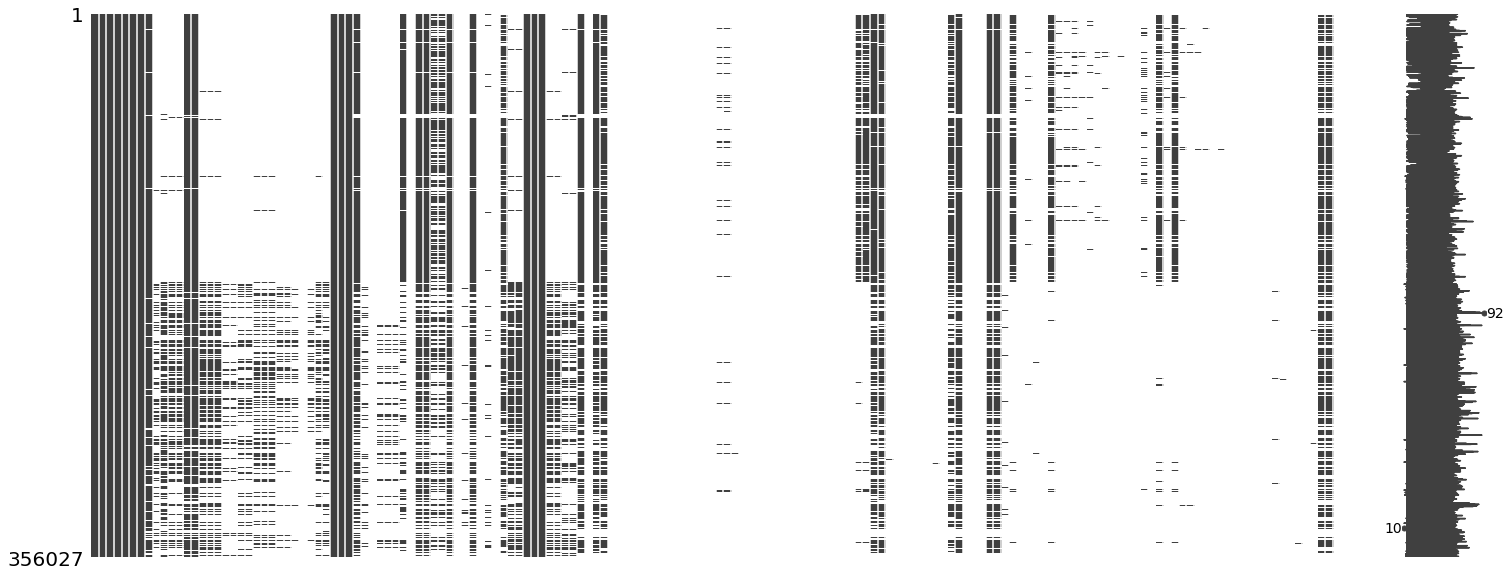

In [3]:
msno.matrix(df)

In [15]:
df.shape

print("Food DataFrame has {} Observations/rows and {} features/columns".format(df.shape[0], df.shape[1]))

Food DataFrame has 356027 Observations/rows and 163 features/columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,283867.0,1.876851,2.501022,0.0,0.00,1.00,3.0,30.0
ingredients_from_palm_oil_n,283867.0,0.023430,0.153094,0.0,0.00,0.00,0.0,2.0
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,283867.0,0.059736,0.280660,0.0,0.00,0.00,0.0,6.0
...,...,...,...,...,...,...,...,...
carbon-footprint_100g,278.0,335.790664,423.244817,0.0,82.65,190.95,378.7,2842.0
nutrition-score-fr_100g,254856.0,9.166137,8.999870,-15.0,1.00,10.00,16.0,40.0
nutrition-score-uk_100g,254856.0,8.980656,9.151757,-15.0,1.00,9.00,16.0,40.0
glycemic-index_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum().sort_values(ascending=False)

water-hardness_100g       356027
nutrition_grade_uk        356027
-nervonic-acid_100g       356027
-erucic-acid_100g         356027
-mead-acid_100g           356027
                           ...  
created_datetime              10
created_t                      3
creator                        3
last_modified_datetime         0
last_modified_t                0
Length: 163, dtype: int64

In [17]:
per_v = df.isna().sum().sort_values(ascending=False) / len(df) *100

Text(0, 0.5, 'Percentage')

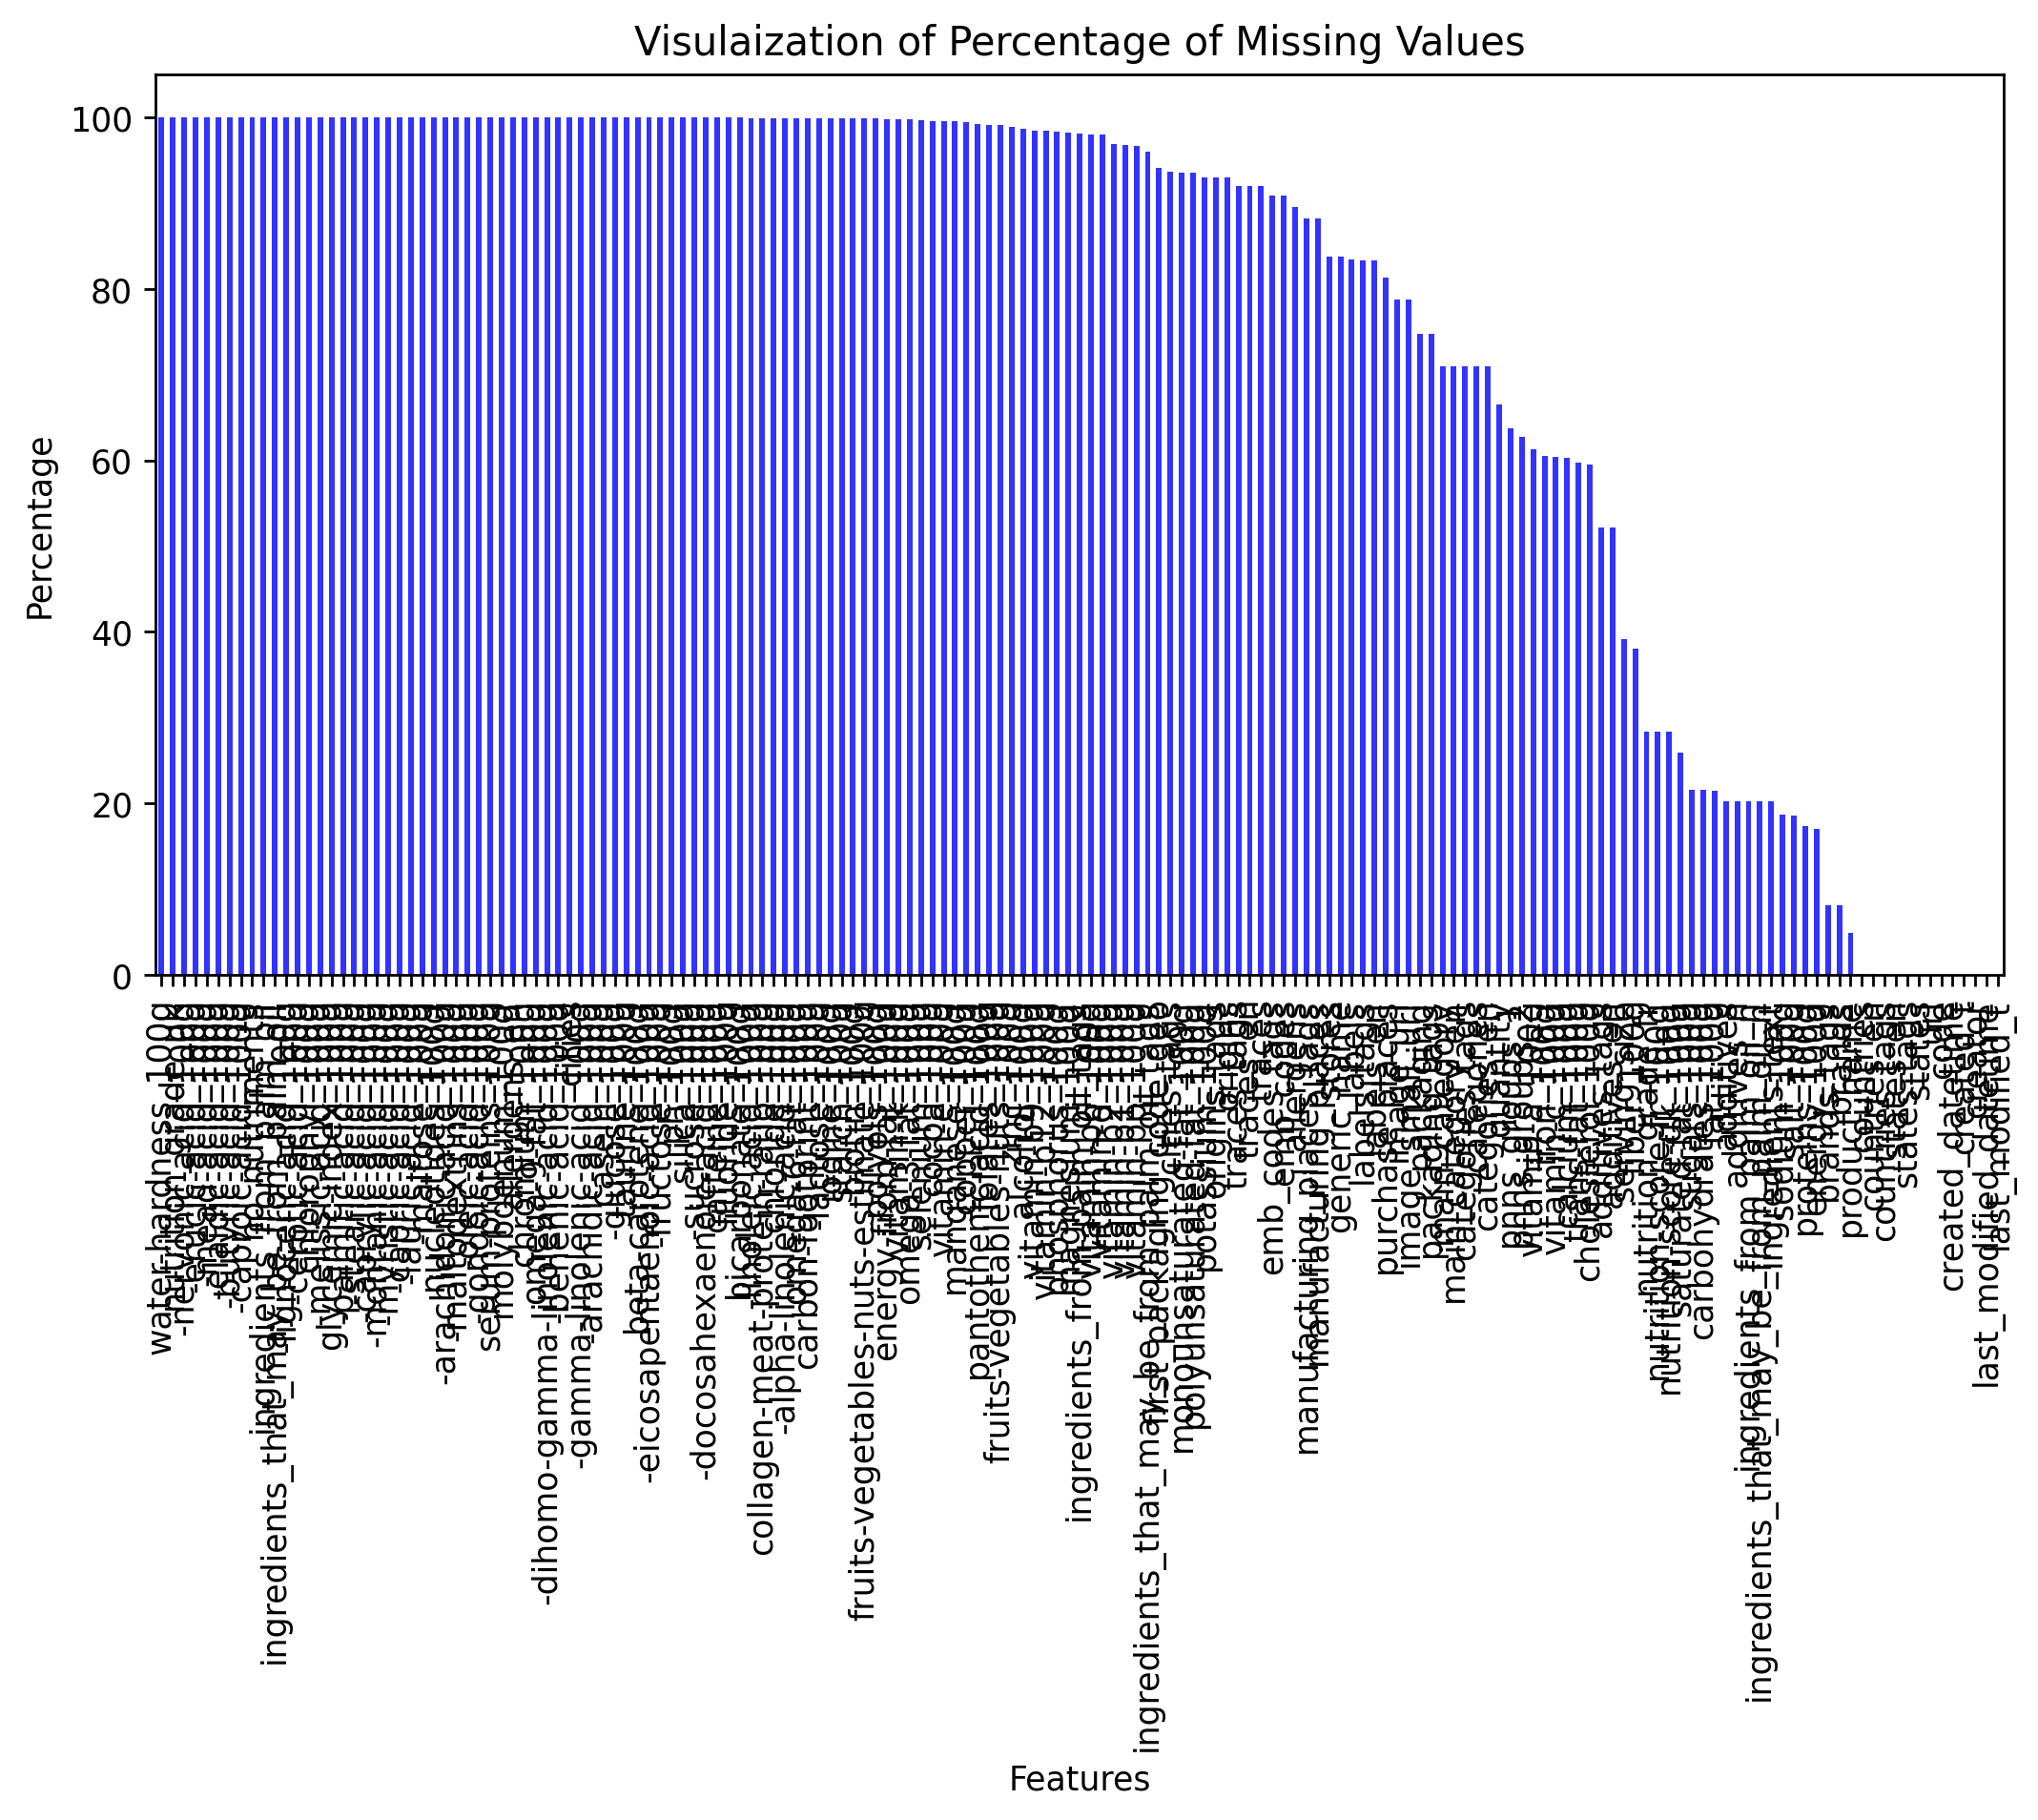

In [22]:
plt.figure(figsize=(10,5), dpi=250)
per_v.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Visulaization of Percentage of Missing Values')
plt.xlabel('Features')
plt.ylabel('Percentage')

In [20]:
#Grouping data according to the missing values according to 10%, 10 to 50% and 50% to 100% missing values
empty = per_v[per_v == 100]
print("First Group- Empty Columns are: {}".format(len(empty)))
low_missing = per_v[per_v < 10]
print("Second Group- Low Missing Columns are: {}".format(len(low_missing)))
medium_missing = per_v[(per_v >= 10) & (per_v < 50)]
print("Third Group- Medium Missing Columns are: {}".format(len(medium_missing)))
high_missing = per_v[(per_v >= 50) & (per_v < 100)]
print("Fourth Group- High Missing Columns are: {}".format(len(high_missing)))

First Group- Empty Columns are: 16
Second Group- Low Missing Columns are: 16
Third Group- Medium Missing Columns are: 18
Fourth Group- High Missing Columns are: 113


In [24]:
#First Group was totally empty and useless so removed
df.drop(columns=empty.index, inplace=True)
df.shape

(356027, 147)

In [25]:
#Dealing with the features having high null observations i.e. Fourth Group (Dropping the columns having high null observations)

for x in high_missing.index:
    if x in df.columns:
        df.drop(x, axis=1, inplace=True)


df.shape

(356027, 34)

In [26]:
#Now dealing with low and medium missing values  and dropping their null observations

df.dropna(inplace=True)

In [28]:
#Clean dataframe
df.shape

(157157, 34)

<AxesSubplot:>

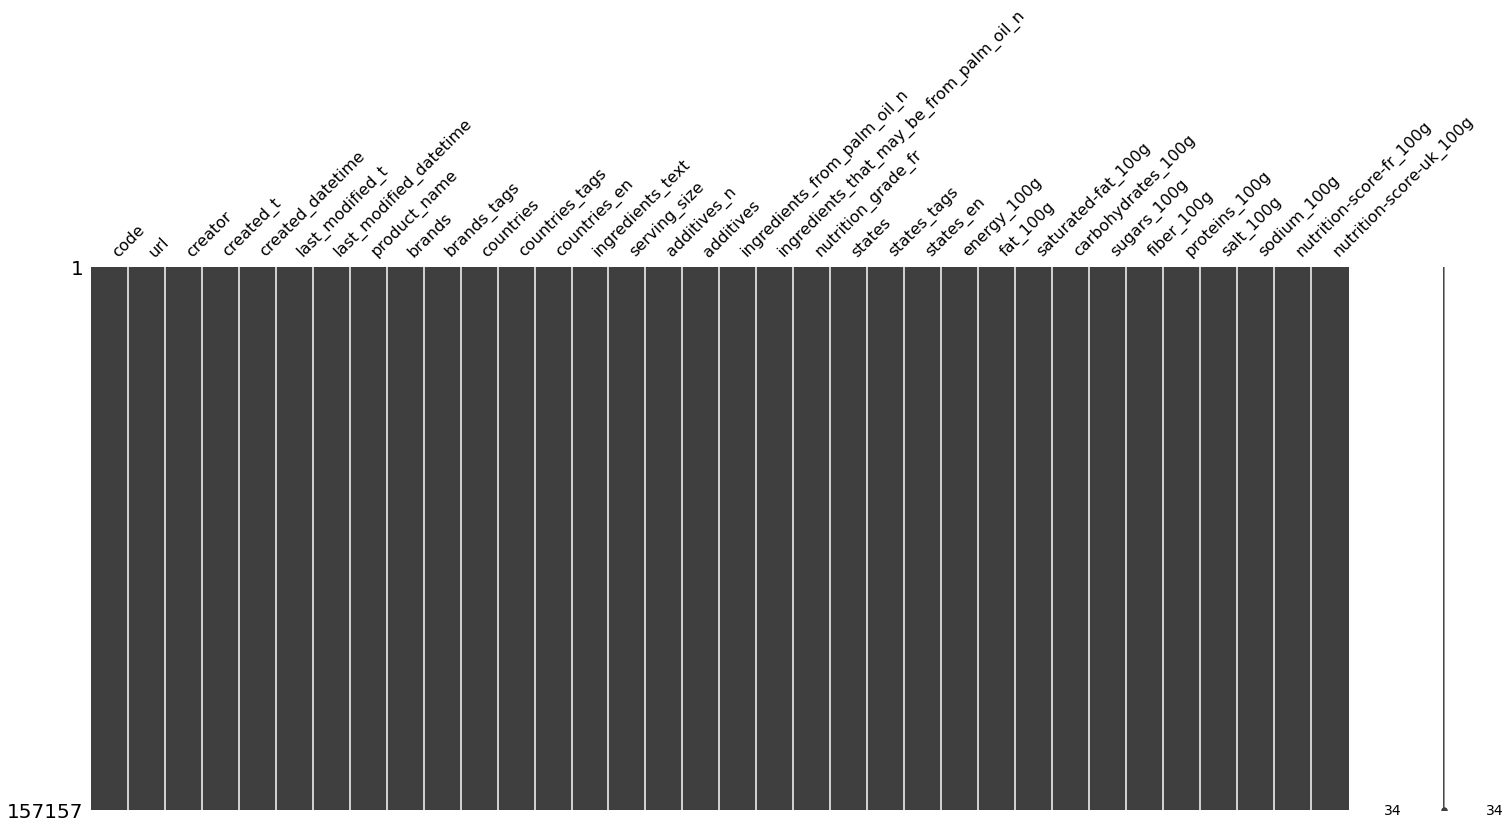

In [29]:
msno.matrix(df)

In [30]:
#Saving the clean DataFrame to a csv file

df.to_csv('food_clean.csv', index=False)

In [40]:
pd.set_option('display.max_columns', None)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
7,16124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,United States,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),1.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0,7.0
12,16872,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,sunridge,US,en:united-states,United States,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),0.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,12.0
15,18012,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055652,2017-03-09T10:34:12Z,1489055653,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,grizzlies,US,en:united-states,United States,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),0.0,[ organic-rolled-oats -> en:organic-rolled-oa...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157157 entries, 2 to 356022
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     157157 non-null  object 
 1   url                                      157157 non-null  object 
 2   creator                                  157157 non-null  object 
 3   created_t                                157157 non-null  object 
 4   created_datetime                         157157 non-null  object 
 5   last_modified_t                          157157 non-null  object 
 6   last_modified_datetime                   157157 non-null  object 
 7   product_name                             157157 non-null  object 
 8   brands                                   157157 non-null  object 
 9   brands_tags                              157157 non-null  object 
 10  countries                       

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,157157.0,2.016748,2.566162,0.00,0.000,1.0000,3.00000,30.0
ingredients_from_palm_oil_n,157157.0,0.014890,0.122988,0.00,0.000,0.0000,0.00000,2.0
ingredients_that_may_be_from_palm_oil_n,157157.0,0.046800,0.242461,0.00,0.000,0.0000,0.00000,6.0
energy_100g,157157.0,1198.209372,753.229866,0.00,469.000,1255.0000,1760.00000,14644.0
fat_100g,157157.0,13.107378,15.451119,0.00,0.880,7.1400,21.43000,100.0
saturated-fat_100g,157157.0,4.652643,6.853992,0.00,0.000,1.7600,6.98000,100.0
carbohydrates_100g,157157.0,35.096633,28.166477,0.00,8.770,27.7800,60.71000,139.0
sugars_100g,157157.0,15.162991,19.393825,-17.86,1.600,5.6000,23.81000,145.0
fiber_100g,157157.0,2.859636,4.362132,0.00,0.000,1.6000,3.60000,100.0
proteins_100g,157157.0,7.809948,7.986831,-3.57,2.340,5.7100,10.71000,100.0


In [43]:
df.product_name.value_counts().head(5)

Ice Cream            405
Potato Chips         274
Premium Ice Cream    226
Pinto Beans          160
Beef Jerky           155
Name: product_name, dtype: int64

In [44]:
df.product_name.value_counts().tail(5)

Beef Bites                                                           1
Hardwood-Smoked Snack Sticks                                         1
Fully Cooked Smoked Sausage Links                                    1
Natural Casing Wiener                                                1
Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint    1
Name: product_name, dtype: int64

In [45]:
df.brands.value_counts().head(5)

Meijer         1543
Kroger         1358
Great Value    1114
Spartan        1065
Carrefour      1052
Name: brands, dtype: int64

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df.shape

(157157, 34)

c:\Users\MohHu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


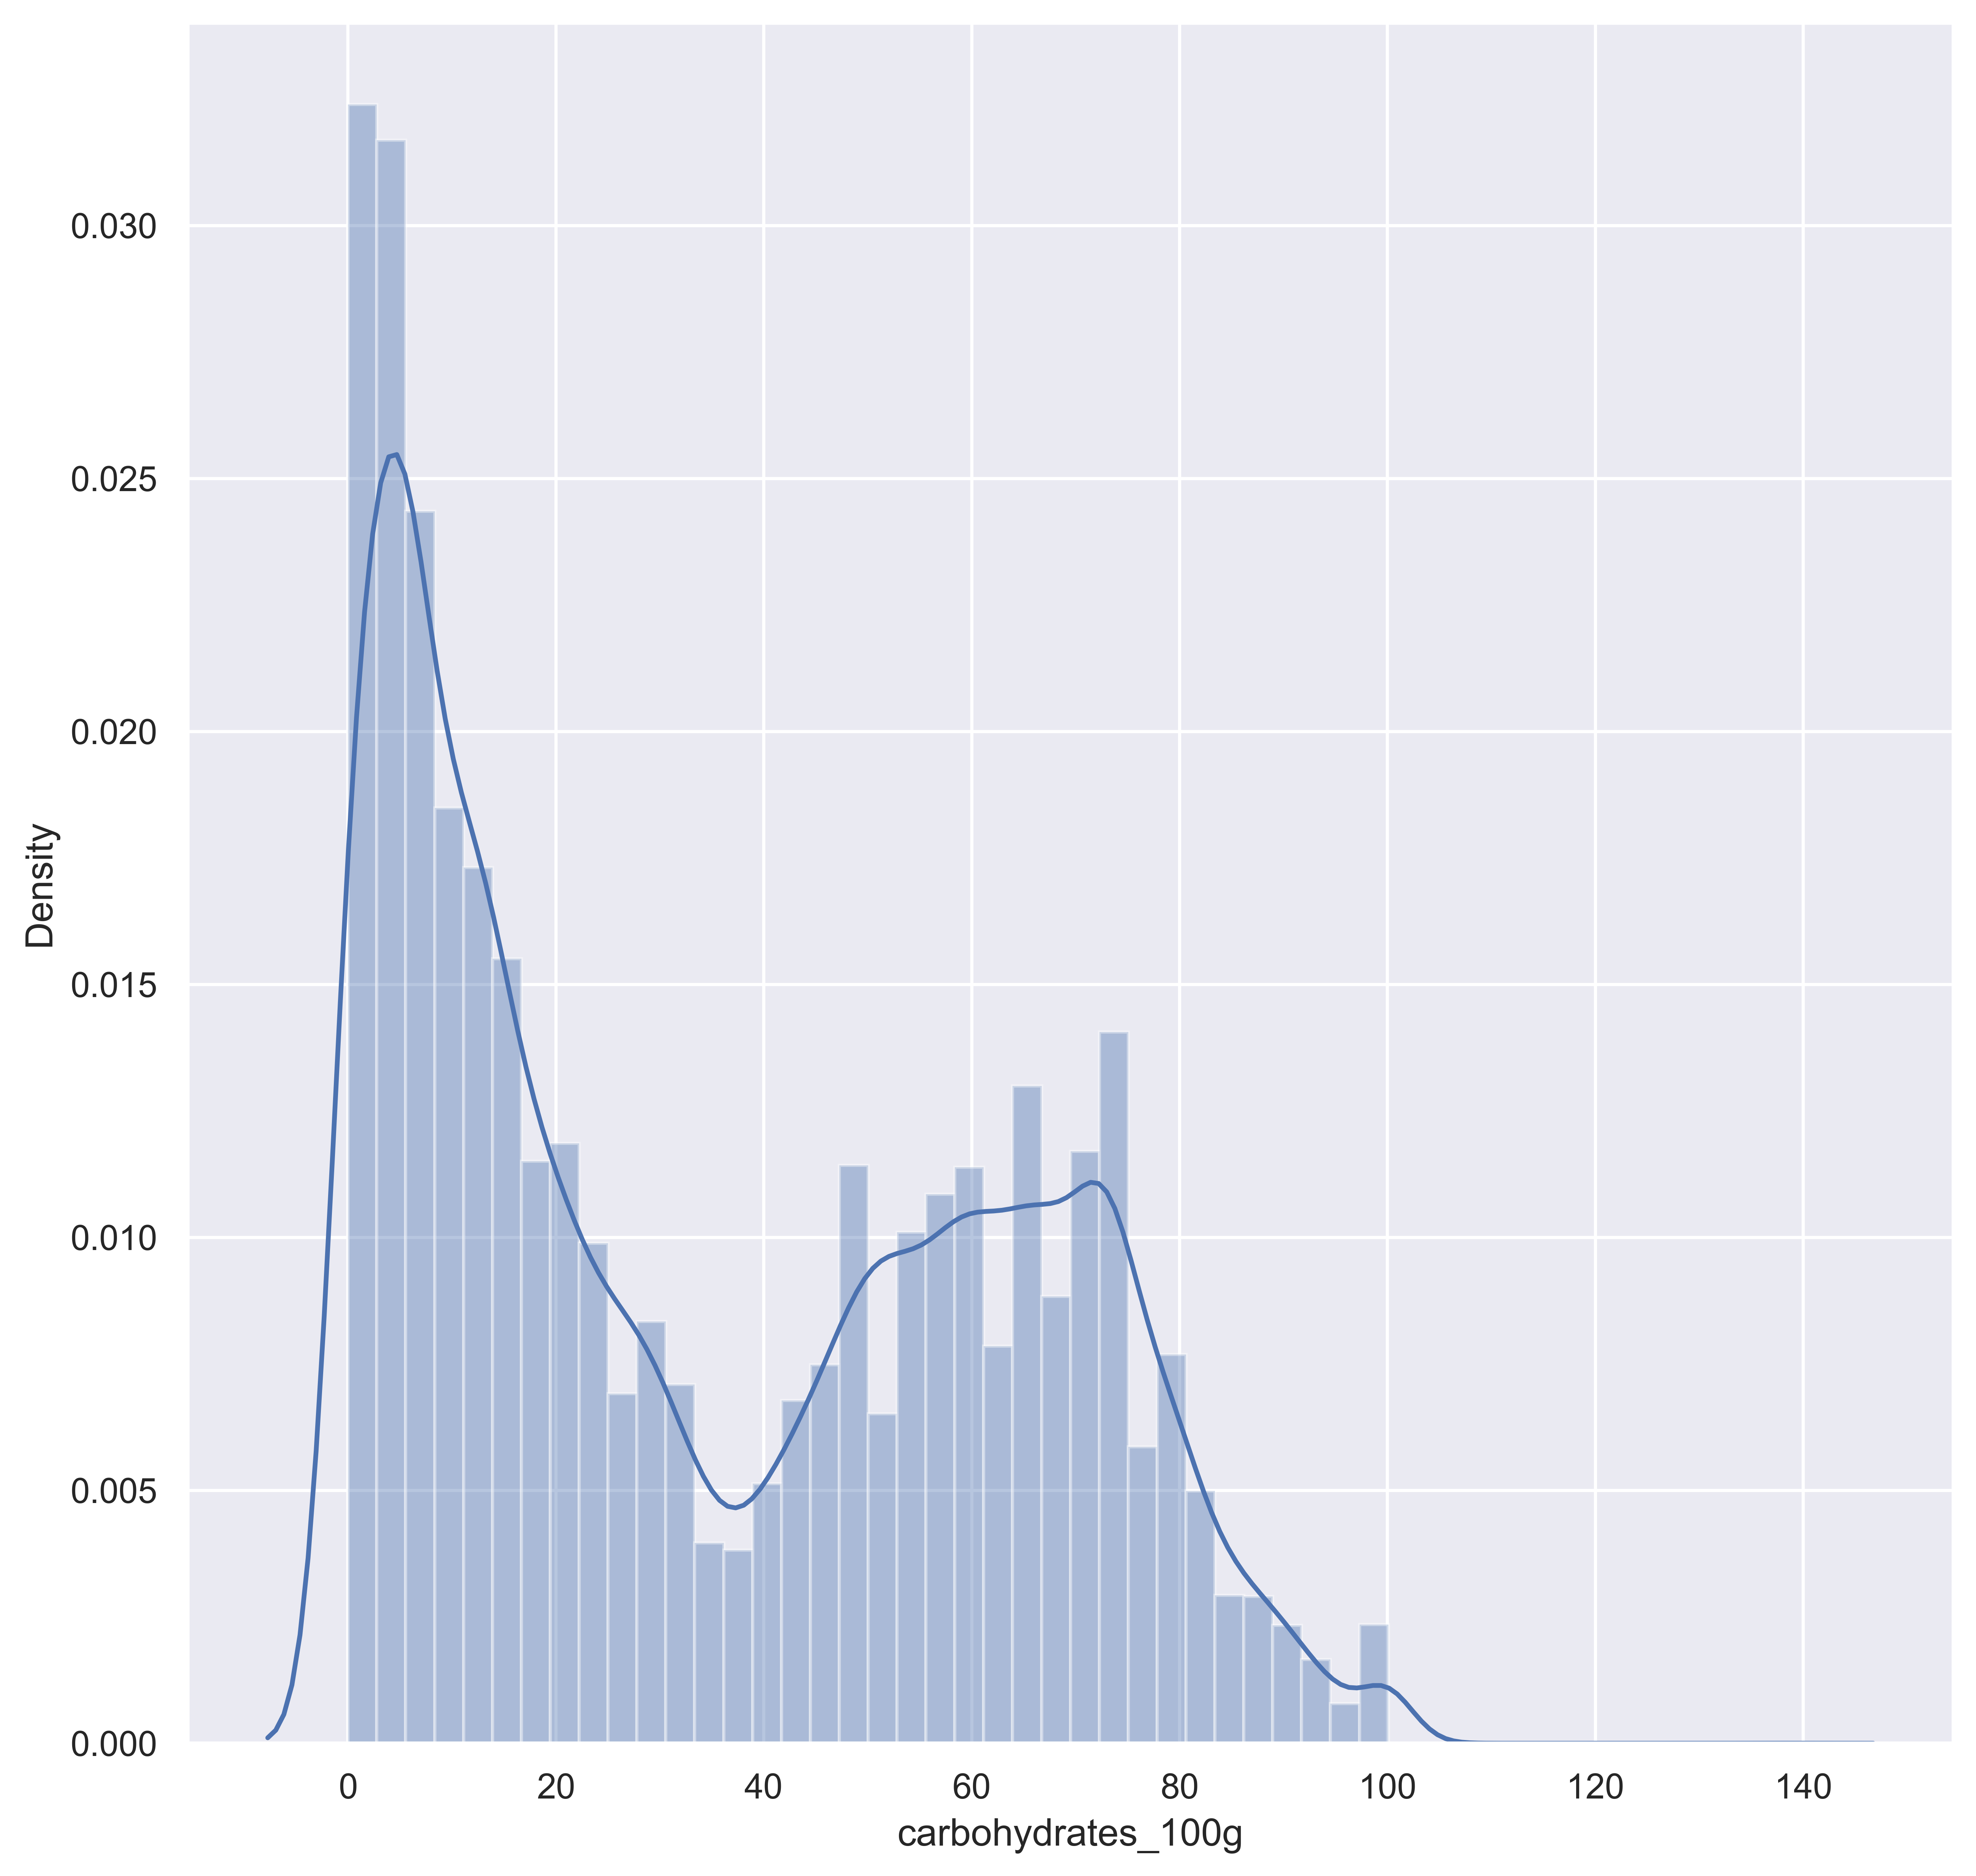

In [69]:
plt.figure(figsize=(10,10), dpi=600)
sns.distplot(df.carbohydrates_100g)
sns.set_theme()

<AxesSubplot:>

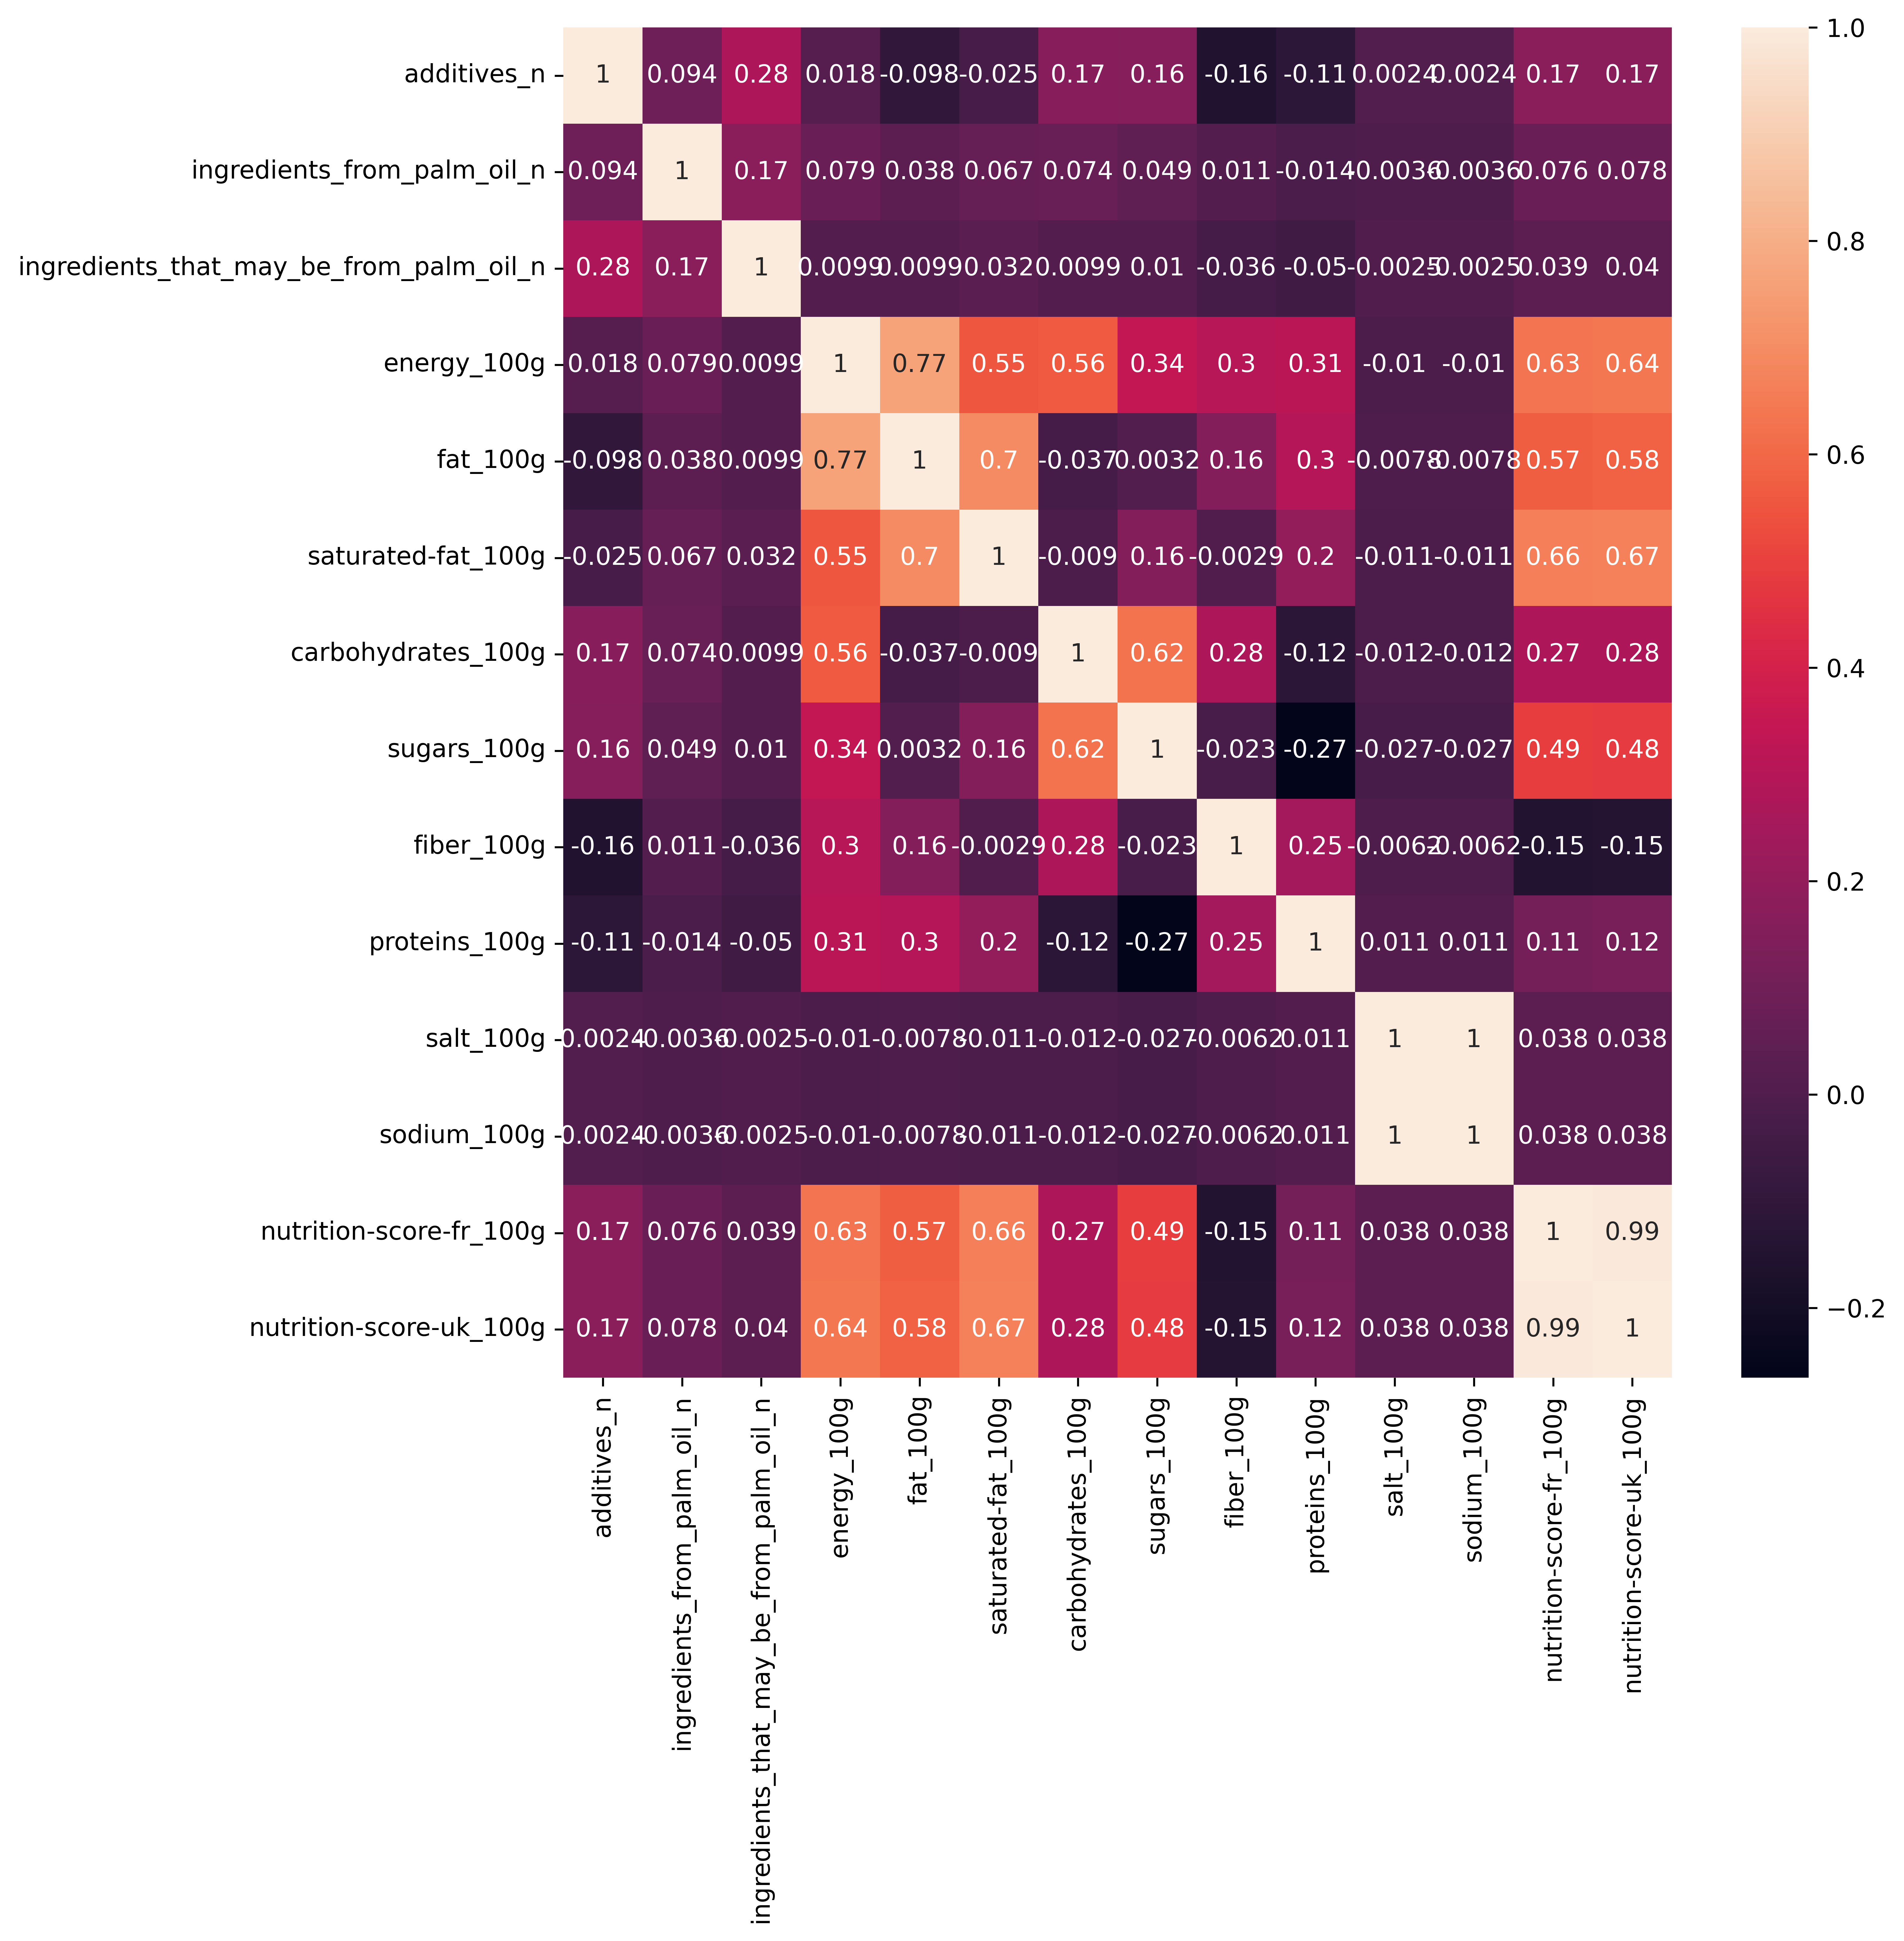

In [66]:
plt.figure(figsize=(10,10), dpi=600)
sns.heatmap(df.corr(), annot=True)